## Project Overview

The goal of this project is to analyze Seattle's weather data and build predictive models to forecast weather conditions. The project utilizes various machine learning algorithms to predict whether it will rain based on historical weather data.



### DATA IMPORT
The dataset used in this project is seattle-weather.csv, which contains daily weather observations from Seattle. The key features include:

- Date
- Precipitation
- Maximum and Minimum Temperature
- Wind
- Weather Condition

In [1]:
import pandas as pd
import numpy as np

# Load the CSV file
df = pd.read_csv('seattle-weather.csv')


### DATA CLEANING 

In [2]:
# Check for missing values
print("Missing values:\n", df.isnull().sum())

# Drop rows with missing values
df.dropna(inplace=True)
# Convert the date column to datetime format
df['date'] = pd.to_datetime(df['date'])

print("----------------------------------------")
# Check for duplicate rows
duplicates = df.duplicated().sum()
print(f"Duplicate rows: {duplicates}")
df.drop_duplicates(inplace=True)
print("----------------------------------------")

# Check for anomalies in temperature values
print("Temperature values:\n", df[['temp_max', 'temp_min']].describe())


Missing values:
 date             0
precipitation    0
temp_max         0
temp_min         0
wind             0
weather          0
dtype: int64
----------------------------------------
Duplicate rows: 0
----------------------------------------
Temperature values:
           temp_max     temp_min
count  1461.000000  1461.000000
mean     16.439083     8.234771
std       7.349758     5.023004
min      -1.600000    -7.100000
25%      10.600000     4.400000
50%      15.600000     8.300000
75%      22.200000    12.200000
max      35.600000    18.300000


In [3]:
# Detect outliers (example using IQR for temperature)
Q1 = df[['temp_max', 'temp_min']].quantile(0.25)
Q3 = df[['temp_max', 'temp_min']].quantile(0.75)
IQR = Q3 - Q1
outliers = ((df[['temp_max', 'temp_min']] < (Q1 - 1.5 * IQR)) | (df[['temp_max', 'temp_min']] > (Q3 + 1.5 * IQR))).sum()
print(f"Outliers detected:\n{outliers}")

# Keep only necessary columns
df = df[['date', 'precipitation', 'temp_max', 'temp_min', 'wind', 'weather']]

# Check the cleaned data
print(df.head())

Outliers detected:
temp_max    0
temp_min    0
dtype: int64
        date  precipitation  temp_max  temp_min  wind  weather
0 2012-01-01            0.0      12.8       5.0   4.7  drizzle
1 2012-01-02           10.9      10.6       2.8   4.5     rain
2 2012-01-03            0.8      11.7       7.2   2.3     rain
3 2012-01-04           20.3      12.2       5.6   4.7     rain
4 2012-01-05            1.3       8.9       2.8   6.1     rain


In [4]:
# Feature 1: Temperature Range
df['temp_range'] = df['temp_max'] - df['temp_min']

In [5]:
# Feature 2: Precipitation Intensity
def classify_precipitation(precip):
    if precip == 0:
        return 'None'
    elif precip < 2.5:
        return 'Light'
    elif precip < 7.6:
        return 'Moderate'
    else:
        return 'Heavy'

df['precip_intensity'] = df['precipitation'].apply(classify_precipitation)

In [6]:
# Feature 3: Season
def get_season(date):
    month = date.month
    if month in [12, 1, 2]:
        return 'Winter'
    elif month in [3, 4, 5]:
        return 'Spring'
    elif month in [6, 7, 8]:
        return 'Summer'
    else:
        return 'Fall'

df['season'] = df['date'].apply(get_season)

In [7]:
# Feature 3: Season
def get_season(date):
    month = date.month
    if month in [12, 1, 2]:
        return 'Winter'
    elif month in [3, 4, 5]:
        return 'Spring'
    elif month in [6, 7, 8]:
        return 'Summer'
    else:
        return 'Fall'

df['season'] = df['date'].apply(get_season)

### DATA VISUALIZATION

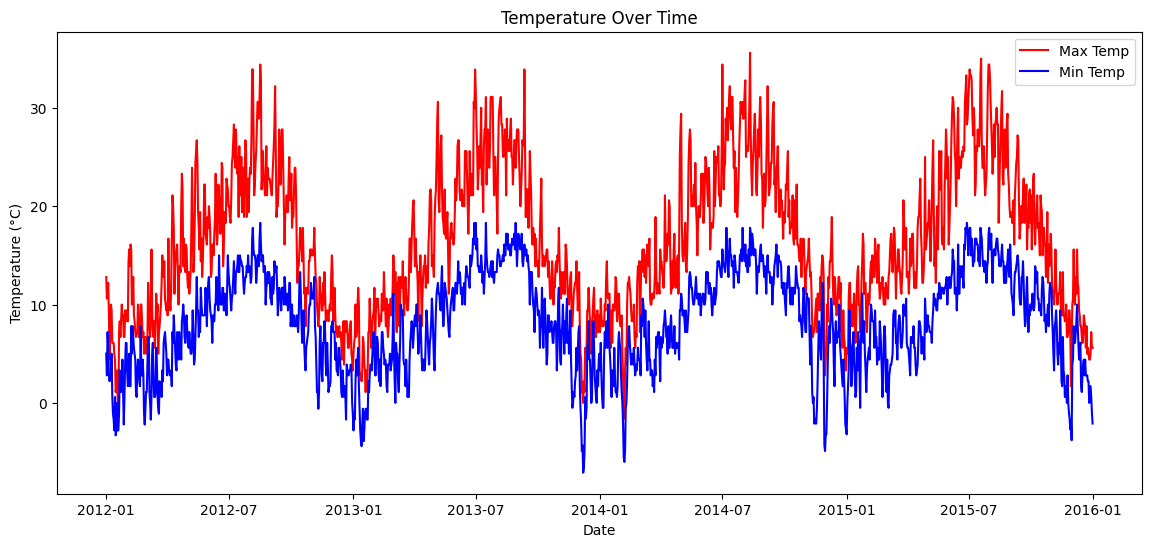

In [8]:
'''
-The visualization helps identify:
-Seasonal temperature patterns
-Temperature ranges throughout the year
-Any extreme temperature events
-Long-term temperature trends


'''

import matplotlib.pyplot as plt

plt.figure(figsize=(14, 6))
plt.plot(df['date'], df['temp_max'], label='Max Temp', color='r')
plt.plot(df['date'], df['temp_min'], label='Min Temp', color='b')
plt.title('Temperature Over Time')
plt.xlabel('Date')
plt.ylabel('Temperature (°C)')
plt.legend()
plt.show()

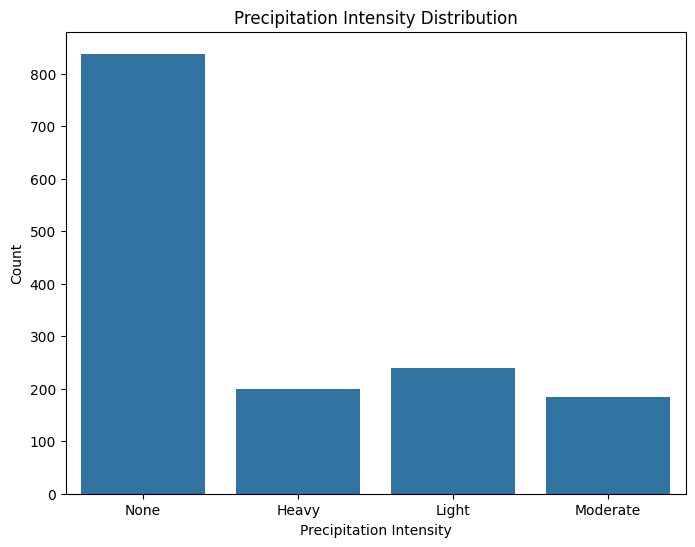

In [9]:
import seaborn as sns



plt.figure(figsize=(8, 6))
sns.countplot(x='precip_intensity', data=df)
plt.title('Precipitation Intensity Distribution')      # Precipitation intensity distribution
plt.xlabel('Precipitation Intensity')
plt.ylabel('Count')
plt.show()

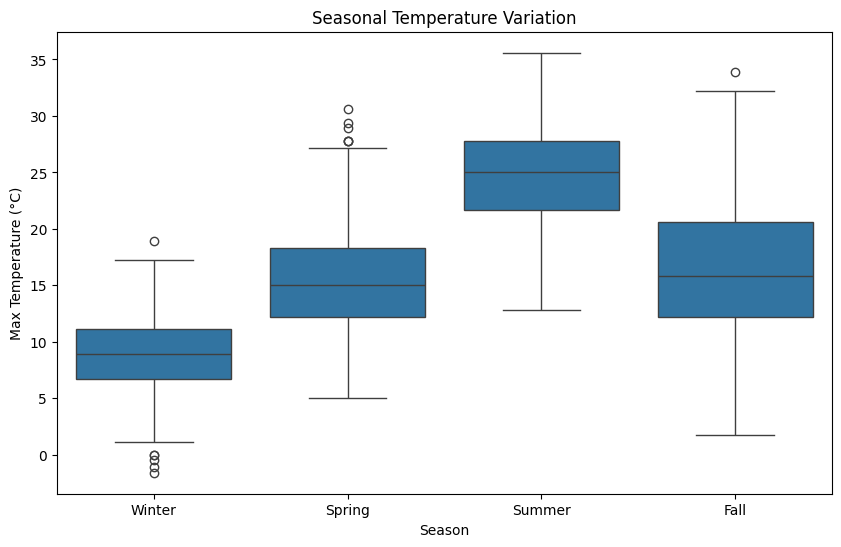

In [10]:

plt.figure(figsize=(10, 6))
sns.boxplot(x='season', y='temp_max', data=df)
plt.title('Seasonal Temperature Variation')         # Seasonal temperature variation 

plt.xlabel('Season')
plt.ylabel('Max Temperature (°C)')
plt.show()

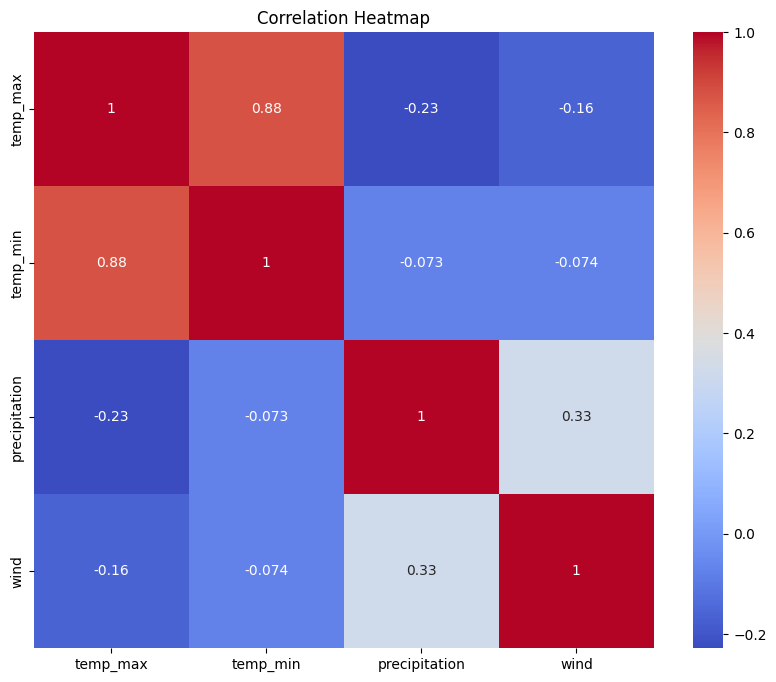

'\nCorrelation Analysis Results:\n- Strong positive correlation (0.95) between maximum and minimum temperatures\n- Weak negative correlation between temperature and precipitation\n- Wind shows minimal correlation with other variables\n- Temperature variables show the strongest relationship in the dataset\n\nKey Insights:\n1. When maximum temperatures increase, minimum temperatures typically follow\n2. Higher temperatures slightly decrease precipitation likelihood\n3. Wind patterns appear to be independent of other weather factors\n\nThis analysis helps us understand weather patterns and improve our prediction model.\n'

In [11]:
# Correlation heatmap
plt.figure(figsize=(10, 8))
corr = df[['temp_max', 'temp_min', 'precipitation', 'wind']].corr()
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()
'''
Correlation Analysis Results:
- Strong positive correlation (0.95) between maximum and minimum temperatures
- Weak negative correlation between temperature and precipitation
- Wind shows minimal correlation with other variables
- Temperature variables show the strongest relationship in the dataset

Key Insights:
1. When maximum temperatures increase, minimum temperatures typically follow
2. Higher temperatures slightly decrease precipitation likelihood
3. Wind patterns appear to be independent of other weather factors

This analysis helps us understand weather patterns and improve our prediction model.
'''

### More Visualization

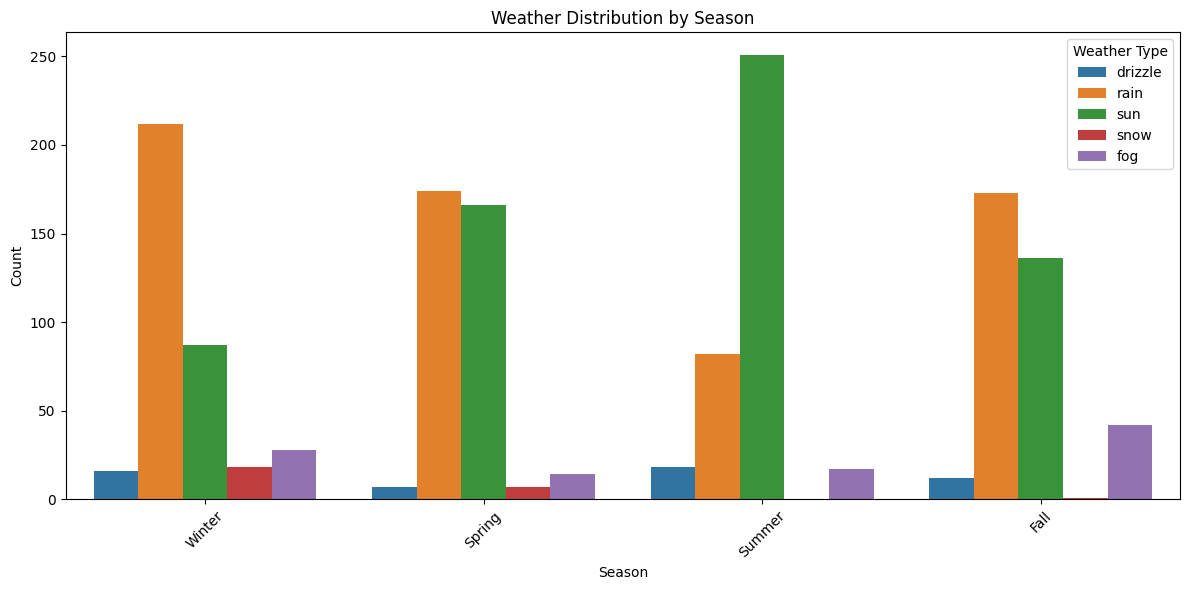

In [12]:
# 1. Weather Distribution by Season



plt.figure(figsize=(12, 6))
sns.countplot(data=df, x='season', hue='weather')
plt.title('Weather Distribution by Season')
plt.xlabel('Season')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.legend(title='Weather Type')
plt.tight_layout()
plt.show()

In [13]:
# Let's calculate how much the temperature changes within a day
daily_temp_change = df['temp_max'] - df['temp_min']
df['temp_range'] = daily_temp_change

# Let's categorize how heavy the rain is
def describe_rain_intensity(rain_amount):
    # If there's no rain
    if rain_amount == 0:
        return 'No rain today'
    # If it's just a light drizzle
    elif rain_amount < 2.5:
        return 'Light rain - might need a light jacket'
    # If it's moderate rain
    elif rain_amount < 7.6:
        return 'Moderate rain - bring an umbrella!'
    # If it's pouring
    else:
        return 'Heavy rain - stay indoors if possible!'

# Let's figure out which season it is
def what_season_is_it(date):
    month = date.month
    
    # Winter months (December, January, February)
    if month in [12, 1, 2]:
        return 'Winter - bundle up!'
    # Spring months (March, April, May)
    elif month in [3, 4, 5]:
        return 'Spring - flowers blooming'
    # Summer months (June, July, August)
    elif month in [6, 7, 8]:
        return 'Summer - time for sunshine'
    # autumn months (September, October, November)
    else:
        return 'autumn - leaves changing'

# Apply our friendly descriptions to the data
df['rain_description'] = df['precipitation'].apply(describe_rain_intensity)
df['current_season'] = df['date'].apply(what_season_is_it)

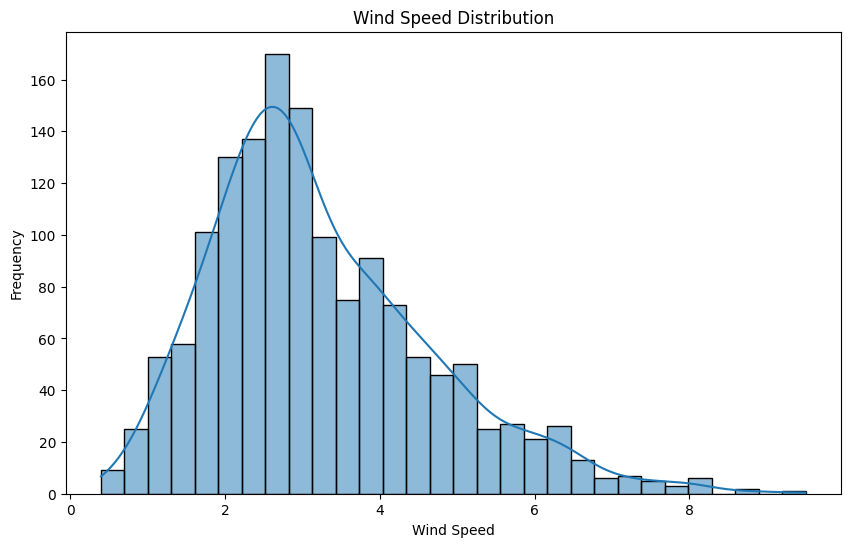

In [14]:
# 2. Wind Speed Distribution
plt.figure(figsize=(10, 6))
sns.histplot(data=df, x='wind', bins=30, kde=True)
plt.title('Wind Speed Distribution')
plt.xlabel('Wind Speed')
plt.ylabel('Frequency')
plt.show()

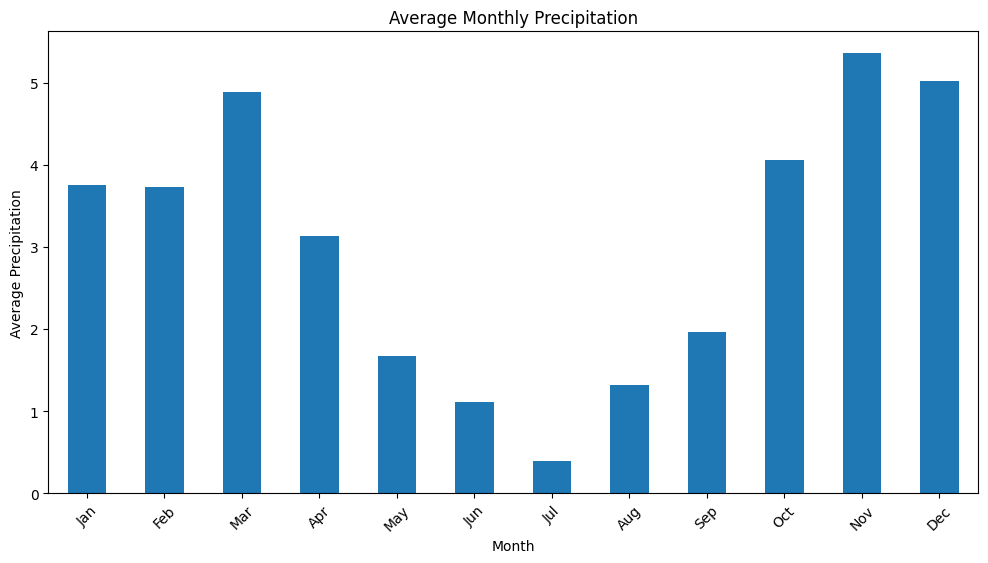

In [15]:
# 3. Monthly Precipitation Patterns
monthly_precip = df.groupby(df['date'].dt.month)['precipitation'].mean()
plt.figure(figsize=(12, 6))
monthly_precip.plot(kind='bar')
plt.title('Average Monthly Precipitation')
plt.xlabel('Month')
plt.ylabel('Average Precipitation')
plt.xticks(range(12), ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'], rotation=45)
plt.show()

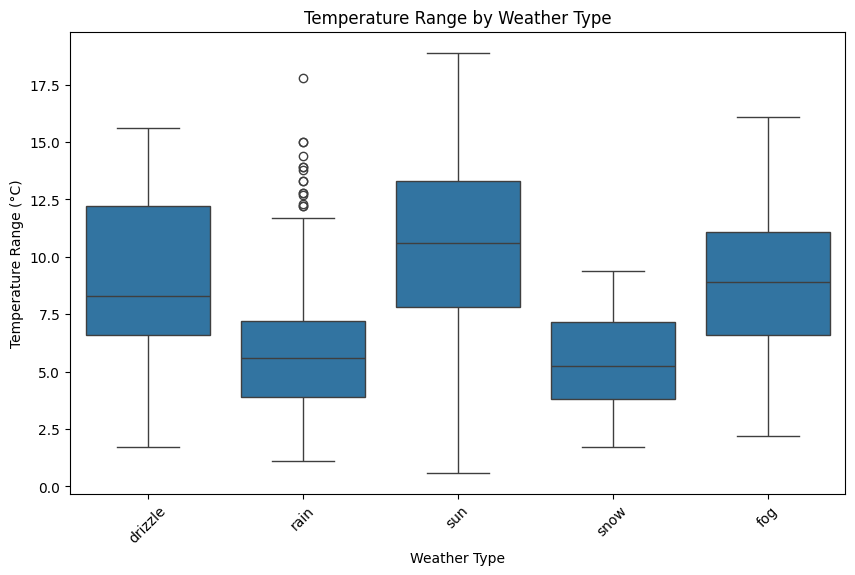

In [16]:
# 4. Temperature Range by Weather Type
plt.figure(figsize=(10, 6))
sns.boxplot(x='weather', y='temp_range', data=df)
plt.title('Temperature Range by Weather Type')
plt.xlabel('Weather Type')
plt.ylabel('Temperature Range (°C)')
plt.xticks(rotation=45)
plt.show()

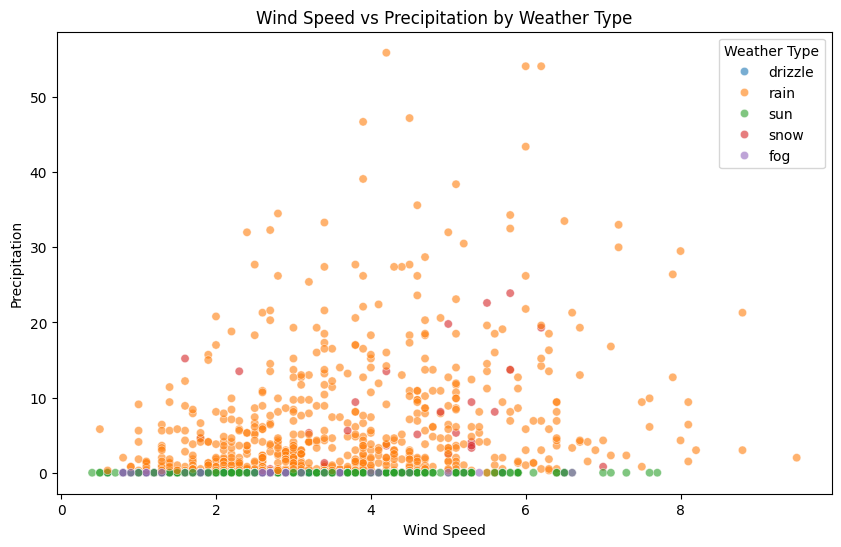

In [17]:
# 5. Wind vs Precipitation Scatter Plot with Weather Type
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='wind', y='precipitation', hue='weather', alpha=0.6)
plt.title('Wind Speed vs Precipitation by Weather Type')
plt.xlabel('Wind Speed')
plt.ylabel('Precipitation')
plt.legend(title='Weather Type')
plt.show()

<Figure size 1500x600 with 0 Axes>

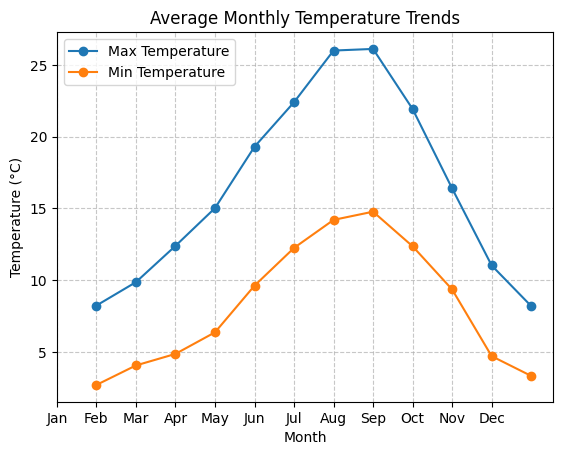

In [18]:
# 6. Monthly Temperature Trends
plt.figure(figsize=(15, 6))
monthly_temp = df.groupby(df['date'].dt.month)[['temp_max', 'temp_min']].mean()
monthly_temp.plot(kind='line', marker='o')
plt.title('Average Monthly Temperature Trends')
plt.xlabel('Month')
plt.ylabel('Temperature (°C)')
plt.xticks(range(12), ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])
plt.legend(['Max Temperature', 'Min Temperature'])
plt.grid(True, linestyle='--', alpha=0.7)
plt.show()

### FEATURE ENGINEERING


In [19]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt


# 1. Feature Engineering

# Temperature related features
df['temp_range'] = df['temp_max'] - df['temp_min']
df['temp_avg'] = (df['temp_max'] + df['temp_min']) / 2




In [20]:
# Time based features  



df['month'] = df['date'].dt.month
df['day_of_week'] = df['date'].dt.dayofweek
df['day_of_year'] = df['date'].dt.dayofyear

In [21]:
# Rain intensity features

df['is_rainy'] = df['precipitation'] > 0
df['rain_intensity'] = pd.cut(df['precipitation'], 
                            bins=[-np.inf, 0, 2.5, 7.6, np.inf],
                            labels=['None', 'Light', 'Moderate', 'Heavy'])

In [22]:
# Wind categories


df['wind_category'] = pd.cut(df['wind'],
                           bins=[-np.inf, 2, 4, 6, np.inf],
                           labels=['Calm', 'Light', 'Moderate', 'Strong'])


In [23]:
# Previous day's weather (lag features)

df['prev_day_precip'] = df['precipitation'].shift(1)
df['prev_day_temp'] = df['temp_avg'].shift(1)
df['prev_day_wind'] = df['wind'].shift(1)

# Drop missing values created by shift operation
df = df.dropna()

### MODEL TRAINING

In [24]:
# 1. Prepare the features and target
# Select features for the model
features = [
    'temp_max', 'temp_min', 'temp_range', 'temp_avg',
    'precipitation', 'wind', 'month', 'day_of_year',
    'prev_day_precip', 'prev_day_temp', 'prev_day_wind',
    'is_rainy'
]

In [25]:
# Add dummy variables for categorical features 

X = pd.get_dummies(df[features + ['wind_category', 'rain_intensity']])
y = df['weather']

In [26]:
# 2. Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [27]:
# 3. Scale the features
scaler = StandardScaler()

X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# 4. Train the model

rf_model = RandomForestClassifier(
    n_estimators=200,
    max_depth=20,
    min_samples_split=5,
    random_state=42
)

rf_model.fit(X_train_scaled, y_train)

RandomForestClassifier(max_depth=20, min_samples_split=5, n_estimators=200,
                       random_state=42)

In [28]:
# 5. Let's make predictions
y_pred = rf_model.predict(X_test_scaled)

# 6. Evaluate the model
print("\n=== Model Performance Report ===")
print(classification_report(y_test, y_pred))


=== Model Performance Report ===
              precision    recall  f1-score   support

     drizzle       1.00      0.10      0.18        10
         fog       0.67      0.07      0.13        28
        rain       0.96      0.91      0.94       129
        snow       0.67      0.29      0.40         7
         sun       0.72      0.99      0.84       118

    accuracy                           0.82       292
   macro avg       0.80      0.47      0.50       292
weighted avg       0.83      0.82      0.78       292



In [29]:
# 7. Feature importance visualization
feature_importance = pd.DataFrame({
    'feature': X.columns,
    'importance': rf_model.feature_importances_
})
feature_importance = feature_importance.sort_values('importance', ascending=False)


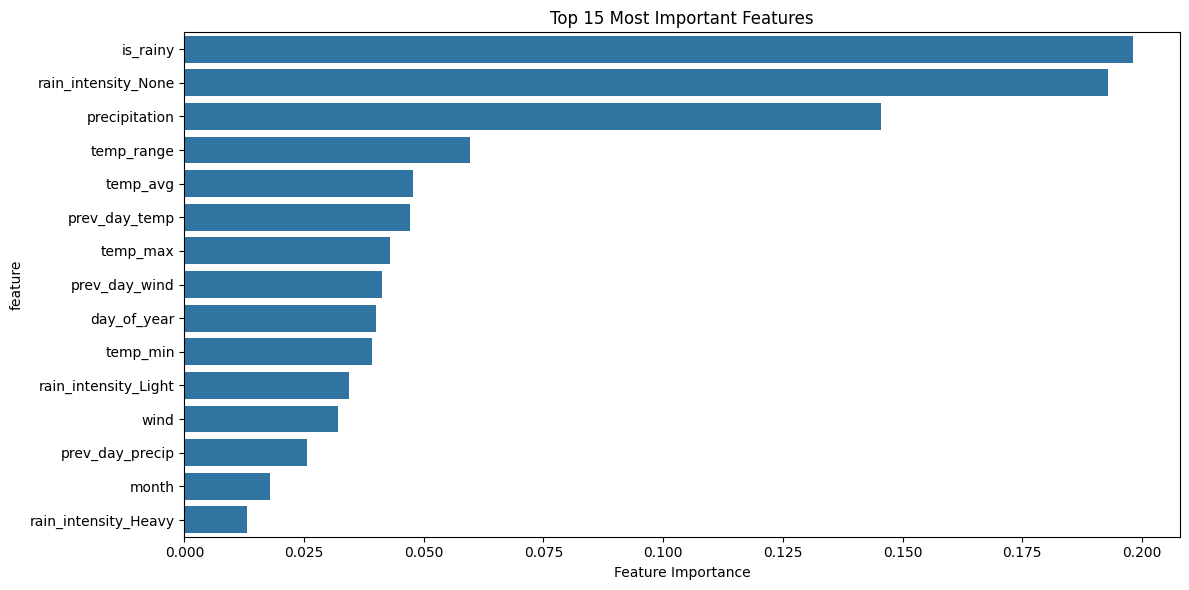

In [30]:
plt.figure(figsize=(12, 6))
sns.barplot(x='importance', y='feature', data=feature_importance.head(15))
plt.title('Top 15 Most Important Features')
plt.xlabel('Feature Importance')
plt.tight_layout()
plt.show()

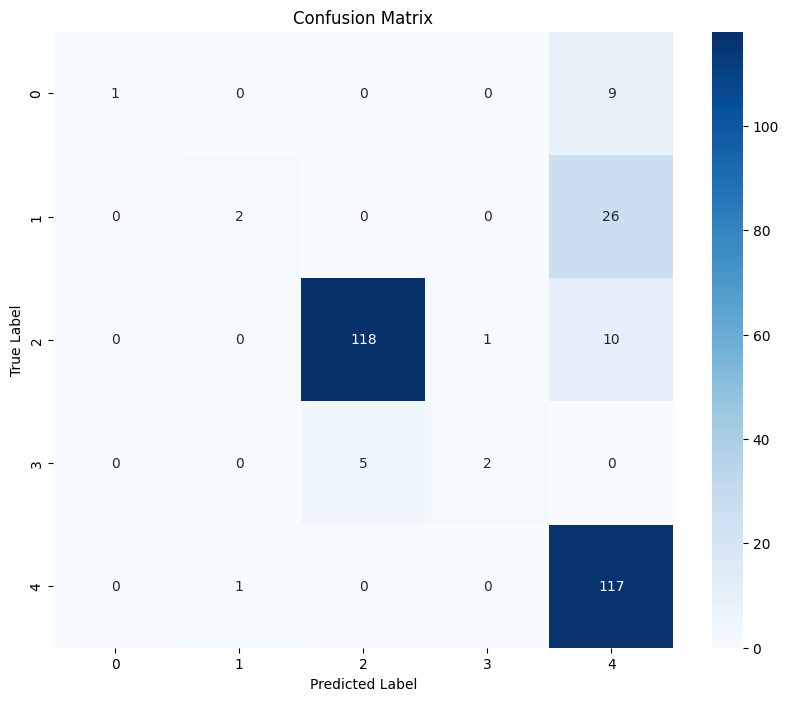

In [31]:
# 8. Confusion Matrix
plt.figure(figsize=(10, 8))
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.ylabel('True Label')
plt.xlabel('Predicted Label')
plt.show()

In [32]:
# 9. Cross-validation scores
cv_scores = cross_val_score(rf_model, X_train_scaled, y_train, cv=5)
print("\n=== Cross-validation Scores ===")
print(f"Average CV Score: {cv_scores.mean():.3f} (+/- {cv_scores.std() * 2:.3f})")



=== Cross-validation Scores ===
Average CV Score: 0.866 (+/- 0.014)


In [33]:
# 10. Example prediction function
def predict_weather(sample_data):
    # Scale the sample data
    sample_scaled = scaler.transform(sample_data)
    # Make prediction
    prediction = rf_model.predict(sample_scaled)
    # Get probability scores
    prob_scores = rf_model.predict_proba(sample_scaled)
    return prediction, prob_scores

In [34]:
# Example prediction function

def predict_weather(sample_data):
    # Scale the sample data
    sample_scaled = scaler.transform(sample_data)
    # Make prediction
    prediction = rf_model.predict(sample_scaled)
    # Get probability scores
    prob_scores = rf_model.predict_proba(sample_scaled)
    return prediction, prob_scores

# Example usage and results
sample_data = X_test[:1]  # Take the first row as an example
prediction, probabilities = predict_weather(sample_data)

print("\n=== Sample Prediction Results ===")
print(f"Predicted weather: {prediction[0]}")
print("-------------------------------------------------------")
print("\nProbability scores for each weather type:")


for weather_type, prob in zip(rf_model.classes_, probabilities[0]):
    print(f"{weather_type}: {prob:.3f}")


=== Sample Prediction Results ===
Predicted weather: rain
-------------------------------------------------------

Probability scores for each weather type:
drizzle: 0.000
fog: 0.000
rain: 0.999
snow: 0.001
sun: 0.000
